In [1]:
#pip install /Users/qingchuanlyu/Documents/Conferences/ICML-2025/icml2025/code/mlrose

In [2]:
import mlrose_hiive as mh

In [3]:
help(mh.runners)

Help on package mlrose_hiive.runners in mlrose_hiive:

NAME
    mlrose_hiive.runners - Classes for running optimization problems.

PACKAGE CONTENTS
    _nn_runner_base
    _runner_base
    ga_border_check_front_runner
    ga_border_check_runner
    ga_js_border_check_simple_runner
    ga_js_runner
    ga_runner
    mimic_runner
    nngs_runner
    rhc_runner
    sa_runner
    skmlp_runner
    utils

FILE
    /Users/qingchuanlyu/anaconda3/envs/cs7641/lib/python3.10/site-packages/mlrose_hiive/runners/__init__.py




In [4]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

from IPython.core.display import display, HTML # for some notebook formatting.

import logging
import networkx as nx
import matplotlib.pyplot as plt
import string


from ast import literal_eval

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

# switch off the chatter
logging.basicConfig(level=logging.WARNING)

In [5]:
import pandas as pd
import importlib
import utility as u

In [6]:
class Task:
    def __init__(self, task_id, duration, deadline, profit):
        self.task_id = task_id
        self.duration = duration
        self.deadline = deadline
        self.profit = profit

In [7]:
size = 7
importlib.reload(u)
tasks = u.generate_random_tasks(size, 5, 80, 25)

In [8]:
"""
with open(f"{size}_tasks.txt", "a") as f:
    for t in tasks:
        print(t.task_id, t.duration, t.deadline, t.profit, file=f)
"""

'\nwith open(f"{size}_tasks.txt", "a") as f:\n    for t in tasks:\n        print(t.task_id, t.duration, t.deadline, t.profit, file=f)\n'

In [9]:
# # Job Scheduling
problem_ffp = mh.JobSchedulingGenerator().generate(seed=0, size=size, tasks=tasks, break_time=1, work_limit=2)
#state = problem_ffp.get_state()

In [10]:
problem_ffp.length

7

In [11]:
problem_ffp.fitness

64.0

In [12]:
# GAJ runner class
# 1. tune population size and mutation rates
ga_ffp = mh.GARunner(problem=problem_ffp,
              experiment_name='ffp_ga',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=0,
              iteration_list=2 ** np.arange(12),
              max_attempts=500,
              population_sizes=[2, 4, 5],
              mutation_rates=[0.1, 0.08]) # Probability of a mutation at each element of the state vector during reproduction, expressed as a value between 0 and 1.

# the two data frames will contain the results
df_run_stats_ffp, df_run_curves_ffp = ga_ffp.run()

In [13]:
df_run_curves_ffp.shape

(6988, 7)

In [14]:
df_run_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.000742,80.0,0.0,2,0.1,2048
1,1,0.006193,80.0,1.0,2,0.1,2048
2,2,0.008682,80.0,2.0,2,0.1,2048
3,3,0.011091,80.0,3.0,2,0.1,2048
4,4,0.011412,80.0,4.0,2,0.1,2048


In [15]:
df_run_curves_ffp['Fitness'].max()

161.0

In [16]:
df_run_curves_ffp[df_run_curves_ffp.Fitness == df_run_curves_ffp['Fitness'].max()]

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
1192,1192,0.961127,161.0,1205.0,2,0.10,2048
1193,1193,0.961888,161.0,1206.0,2,0.10,2048
1194,1194,0.963411,161.0,1207.0,2,0.10,2048
1195,1195,0.965235,161.0,1208.0,2,0.10,2048
1196,1196,0.968421,161.0,1209.0,2,0.10,2048
...,...,...,...,...,...,...,...
6983,895,0.630662,161.0,904.0,5,0.08,2048
6984,896,0.631513,161.0,905.0,5,0.08,2048
6985,897,0.632293,161.0,906.0,5,0.08,2048
6986,898,0.635106,161.0,907.0,5,0.08,2048


In [17]:
# need to check Time and FEvals

In [18]:
df_curves_bestfitness_ffp = df_run_curves_ffp[(df_run_curves_ffp['Fitness'] == df_run_curves_ffp['Fitness'].max())]

In [19]:
df_curves_bestfitness_ffp

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
1192,1192,0.961127,161.0,1205.0,2,0.10,2048
1193,1193,0.961888,161.0,1206.0,2,0.10,2048
1194,1194,0.963411,161.0,1207.0,2,0.10,2048
1195,1195,0.965235,161.0,1208.0,2,0.10,2048
1196,1196,0.968421,161.0,1209.0,2,0.10,2048
...,...,...,...,...,...,...,...
6983,895,0.630662,161.0,904.0,5,0.08,2048
6984,896,0.631513,161.0,905.0,5,0.08,2048
6985,897,0.632293,161.0,906.0,5,0.08,2048
6986,898,0.635106,161.0,907.0,5,0.08,2048


In [20]:
df_curves_bestfitness_ffp.groupby(['Population Size', 'Mutation Rate']).agg({'FEvals': 'min', 'Iteration': 'mean', 'Time': 'min'}).reset_index()
# Temp = 1 => less Fevals. Pick temp=1

,Population Size,Mutation Rate,FEvals,Iteration,Time
0,2,0.08,1209.0,1448.0,0.000152
1,2,0.10,1205.0,1442.0,0.961127
2,4,0.08,409.0,649.0,0.256713
3,4,0.10,409.0,647.0,0.254527
4,5,0.08,408.0,649.0,0.256713
5,5,0.10,407.0,647.0,0.254527


In [72]:
# tentatively, pick pop size = 5 and mutation_rate = 0.1

In [21]:
df_run_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.000742,80.0,0.0,2,0.1,2048
1,1,0.006193,80.0,1.0,2,0.1,2048
2,2,0.008682,80.0,2.0,2,0.1,2048
3,3,0.011091,80.0,3.0,2,0.1,2048
4,4,0.011412,80.0,4.0,2,0.1,2048


In [23]:
# clean up an existing result table to store the iterative resutls
df_iter_curves_ffp = df_run_curves_ffp.drop(df_run_curves_ffp.index, inplace=False)

In [24]:
# GA runner
# 2. iterate through 10 seeds
for s in range(10):
    ga_ffp = mh.GARunner(problem=problem_ffp,
              experiment_name='ffp_ga_{s}',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=s,
              iteration_list=2 ** np.arange(12),
              max_attempts=500,
              population_sizes=[5], # 20 bits in total
              mutation_rates=[0.1])

    # the two data frames will contain the results
    df_run_stats_ffp_sub, df_run_curves_ffp_sub = ga_ffp.run()
    # append to the result df
    df_iter_curves_ffp = pd.concat([df_iter_curves_ffp, df_run_curves_ffp_sub])

In [25]:
df_iter_curves_ffp.shape

(8939, 7)

In [26]:
df_iter_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.003813,80.0,0.0,5,0.1,2048
1,1,0.012423,107.0,2.0,5,0.1,2048
2,2,0.022122,110.0,4.0,5,0.1,2048
3,3,0.030217,110.0,5.0,5,0.1,2048
4,4,0.033001,110.0,6.0,5,0.1,2048


In [27]:
df_iter_curves_ffp.Fitness.max()

161.0

In [3]:
#df_iter_curves_ffp.to_csv(f'ga_js_{size}.csv')
import pandas as pd
import numpy as np
size = 7
df_iter_curves_ffp = pd.read_csv(f'../../csv-files/ga_js_{size}.csv')

In [29]:
df_iter_curves_ffp.Iteration.max()

1083

In [5]:
df_fitness_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_fitness=('Fitness', 'mean'), var_fitness = ('Fitness', 'var'))\
                                .reset_index()

In [31]:
df_fitness_iter_ffp.shape

(1084, 3)

In [32]:
df_fitness_iter_ffp.head()

,Iteration,avg_fitness,var_fitness
0,0,79.0,336.444444
1,1,97.1,69.655556
2,2,99.1,86.544444
3,3,101.5,70.500000
4,4,101.9,66.100000


In [33]:
# convergence point
df_iter_curves_ffp[df_iter_curves_ffp.Fitness == df_iter_curves_ffp.Fitness.max()].Iteration

397      397
398      398
399      399
400      400
401      401
        ... 
1025    1025
1026    1026
1027    1027
1028    1028
1029    1029
Name: Iteration, Length: 5010, dtype: int64

In [34]:
# converge point
df_fitness_iter_ffp[df_fitness_iter_ffp.avg_fitness >= df_iter_curves_ffp.Fitness.max()].Iteration.min()

583

In [6]:
converge_iter = df_fitness_iter_ffp[df_fitness_iter_ffp.avg_fitness >= df_iter_curves_ffp.Fitness.max()].Iteration.min()

In [35]:
df_fitness_iter_ffp['stddev_fitness'] = df_fitness_iter_ffp['var_fitness'].apply(np.sqrt)

In [36]:
df_fitness_iter_ffp.head()

,Iteration,avg_fitness,var_fitness,stddev_fitness
0,0,79.0,336.444444,18.342422
1,1,97.1,69.655556,8.345990
2,2,99.1,86.544444,9.302927
3,3,101.5,70.500000,8.396428
4,4,101.9,66.100000,8.130191


Text(0, 0.5, 'Fitness')

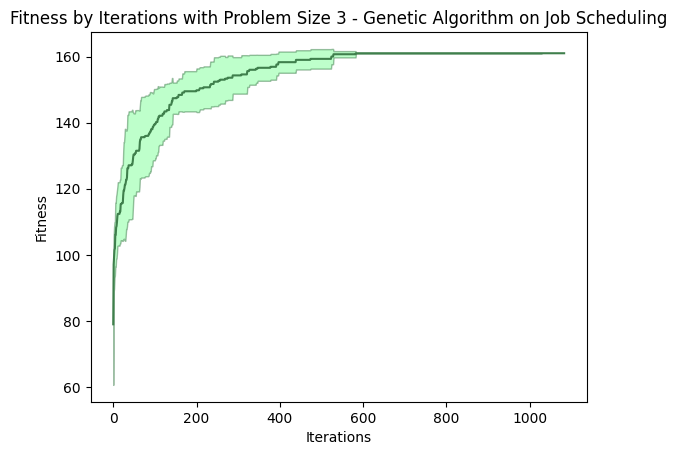

In [37]:
plt.plot(df_fitness_iter_ffp.Iteration, df_fitness_iter_ffp.avg_fitness, 'k', color='#3F7F4C')
plt.fill_between(df_fitness_iter_ffp.Iteration, df_fitness_iter_ffp.avg_fitness - df_fitness_iter_ffp.stddev_fitness\
                 , df_fitness_iter_ffp.avg_fitness + df_fitness_iter_ffp.stddev_fitness\
                 , alpha=0.5, edgecolor='#3F7F4C', facecolor='#7EFF99')
plt.title('Fitness by Iterations with Problem Size 3 - Genetic Algorithm on Job Scheduling')
plt.xlabel('Iterations')
plt.ylabel('Fitness')

In [38]:
df_fitness_iter_ffp[df_fitness_iter_ffp.Iteration == 400].avg_fitness

400    158.3
Name: avg_fitness, dtype: float64

In [39]:
df_fitness_iter_ffp[df_fitness_iter_ffp.avg_fitness == 178].stddev_fitness.min(),df_fitness_iter_ffp[df_fitness_iter_ffp.avg_fitness == 178].stddev_fitness.max()

(nan, nan)

In [40]:
df_fitness_iter_ffp[df_fitness_iter_ffp.avg_fitness == 178].Iteration.min(),df_fitness_iter_ffp[df_fitness_iter_ffp.avg_fitness == 178].Iteration.max()

(nan, nan)

In [41]:
df_fitness_iter_ffp.stddev_fitness.max()

18.342421989596804

In [42]:
df_fitness_iter_ffp[df_fitness_iter_ffp['Iteration']>0].stddev_fitness.max()

16.936482646773044

In [43]:
df_fitness_iter_ffp[df_fitness_iter_ffp.stddev_fitness == df_fitness_iter_ffp.stddev_fitness.max()].Iteration,

(0    0
 Name: Iteration, dtype: int64,)

In [44]:
df_fitness_iter_ffp[df_fitness_iter_ffp.stddev_fitness == df_fitness_iter_ffp[df_fitness_iter_ffp['Iteration']>0].stddev_fitness.max()].Iteration

28    28
29    29
Name: Iteration, dtype: int64

In [45]:
# Fevals - iteration

In [8]:
df_FEvals_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_FEvals=('FEvals', 'mean'), var_FEvals = ('FEvals', 'var'))\
                                .reset_index()

In [47]:
df_FEvals_iter_ffp.shape

(1084, 3)

In [48]:
df_FEvals_iter_ffp.head()

,Iteration,avg_FEvals,var_FEvals
0,0,0.0,0.000000
1,1,1.8,0.177778
2,2,3.1,0.544444
3,3,4.4,0.711111
4,4,5.6,1.155556


In [9]:
df_FEvals_iter_ffp['stddev_FEvals'] = df_FEvals_iter_ffp['var_FEvals'].apply(np.sqrt)

In [10]:
df_FEvals_iter_ffp[df_FEvals_iter_ffp['Iteration'] == converge_iter]

,Iteration,avg_FEvals,var_FEvals,stddev_FEvals
583,583,593.4,2.266667,1.505545


In [50]:
df_FEvals_iter_ffp['stddev_FEvals'].min(), df_FEvals_iter_ffp['stddev_FEvals'].max()

(0.0, 2.201009869229229)

In [51]:
df_FEvals_iter_ffp.head()

,Iteration,avg_FEvals,var_FEvals,stddev_FEvals
0,0,0.0,0.000000,0.000000
1,1,1.8,0.177778,0.421637
2,2,3.1,0.544444,0.737865
3,3,4.4,0.711111,0.843274
4,4,5.6,1.155556,1.074968


Text(0, 0.5, 'FEvals')

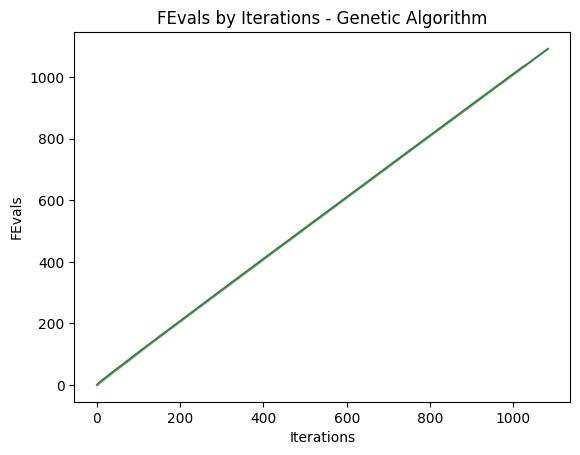

In [52]:
plt.plot(df_FEvals_iter_ffp.Iteration, df_FEvals_iter_ffp.avg_FEvals, 'k', color='#3F7F4C')
plt.fill_between(df_FEvals_iter_ffp.Iteration, df_FEvals_iter_ffp.avg_FEvals - df_FEvals_iter_ffp.stddev_FEvals\
                 , df_FEvals_iter_ffp.avg_FEvals + df_FEvals_iter_ffp.stddev_FEvals\
                 , alpha=0.5, edgecolor='#3F7F4C', facecolor='#7EFF99')
plt.title('FEvals by Iterations - Genetic Algorithm')
plt.xlabel('Iterations')
plt.ylabel('FEvals')

In [53]:
# fitness - wall clock time

In [11]:
df_time_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_time=('Time', 'mean'), var_time = ('Time', 'var'))\
                                .reset_index()

In [55]:
df_time_iter_ffp.shape

(1084, 3)

In [56]:
df_time_iter_ffp.head()

,Iteration,avg_time,var_time
0,0,0.000659,0.000001
1,1,0.004481,0.000011
2,2,0.008353,0.000030
3,3,0.012223,0.000050
4,4,0.012981,0.000060


In [12]:
df_time_iter_ffp['stddev_time'] = df_time_iter_ffp['var_time'].apply(np.sqrt)

In [58]:
df_time_iter_ffp.head()

,Iteration,avg_time,var_time,stddev_time
0,0,0.000659,0.000001,0.001120
1,1,0.004481,0.000011,0.003278
2,2,0.008353,0.000030,0.005446
3,3,0.012223,0.000050,0.007088
4,4,0.012981,0.000060,0.007748


Text(0, 0.5, 'Time')

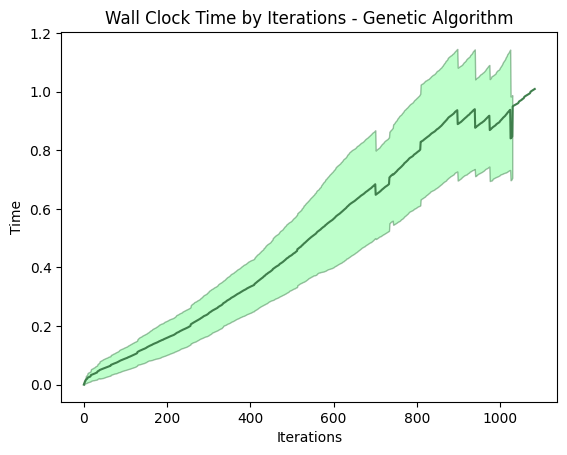

In [59]:
plt.plot(df_time_iter_ffp.Iteration, df_time_iter_ffp.avg_time, 'k', color='#3F7F4C')
plt.fill_between(df_time_iter_ffp.Iteration, df_time_iter_ffp.avg_time - df_time_iter_ffp.stddev_time\
                 , df_time_iter_ffp.avg_time + df_time_iter_ffp.stddev_time\
                 , alpha=0.5, edgecolor='#3F7F4C', facecolor='#7EFF99')
plt.title('Wall Clock Time by Iterations - Genetic Algorithm')
plt.xlabel('Iterations')
plt.ylabel('Time')

In [60]:
df_time_iter_ffp.stddev_time.max()

0.20889893652355065

In [61]:
df_time_iter_ffp[df_time_iter_ffp['Iteration'] == 501]

,Iteration,avg_time,var_time,stddev_time
501,501,0.444257,0.014116,0.118811


In [62]:
df_time_iter_ffp[df_time_iter_ffp.stddev_time == df_time_iter_ffp.stddev_time.max()].Iteration

897    897
Name: Iteration, dtype: int64

In [13]:
df_time_iter_ffp[df_time_iter_ffp['Iteration'] == converge_iter]

,Iteration,avg_time,var_time,stddev_time
583,583,0.547353,0.024362,0.156084
